In [85]:
#source activate newEnv
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
#suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(harmony))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(future))
library(dplyr)
library(Seurat)
library(ggplot2)
library(sctransform)
#library(scater)
library(reticulate)
library(future)
#library('gPCA')
library('Biobase')
#library(pheatmap)
#library("ggfortify")
#library('qvalue')
library(gplots)
#library('DESeq2')
#library(VennDiagram)
library('hdf5r')
library(EnsDb.Hsapiens.v86)
#library(EnsDb.Mmusculus.v79)
library(BiocParallel)
#library(tictoc)
library(Seurat)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(cowplot)
library(GenomeInfoDb)
#devtools::install_github("timoast/signac")

In [2]:
# Read sciATAC RDS object which from peak based clustering
pfc_obj <- readRDS('/nfs/lab/brain_hiv_rana/all_files/230828_PFC_13samples_HVWs_combined.rds')

In [3]:
pfc_obj

An object of class Seurat 
156845 features across 118677 samples within 4 assays 
Active assay: ATAC (50000 features, 50000 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 7 dimensional reductions calculated: pca, harmony.rna, umap.rna, lsi, harmony.atac, umap.atac, umap.wnn

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



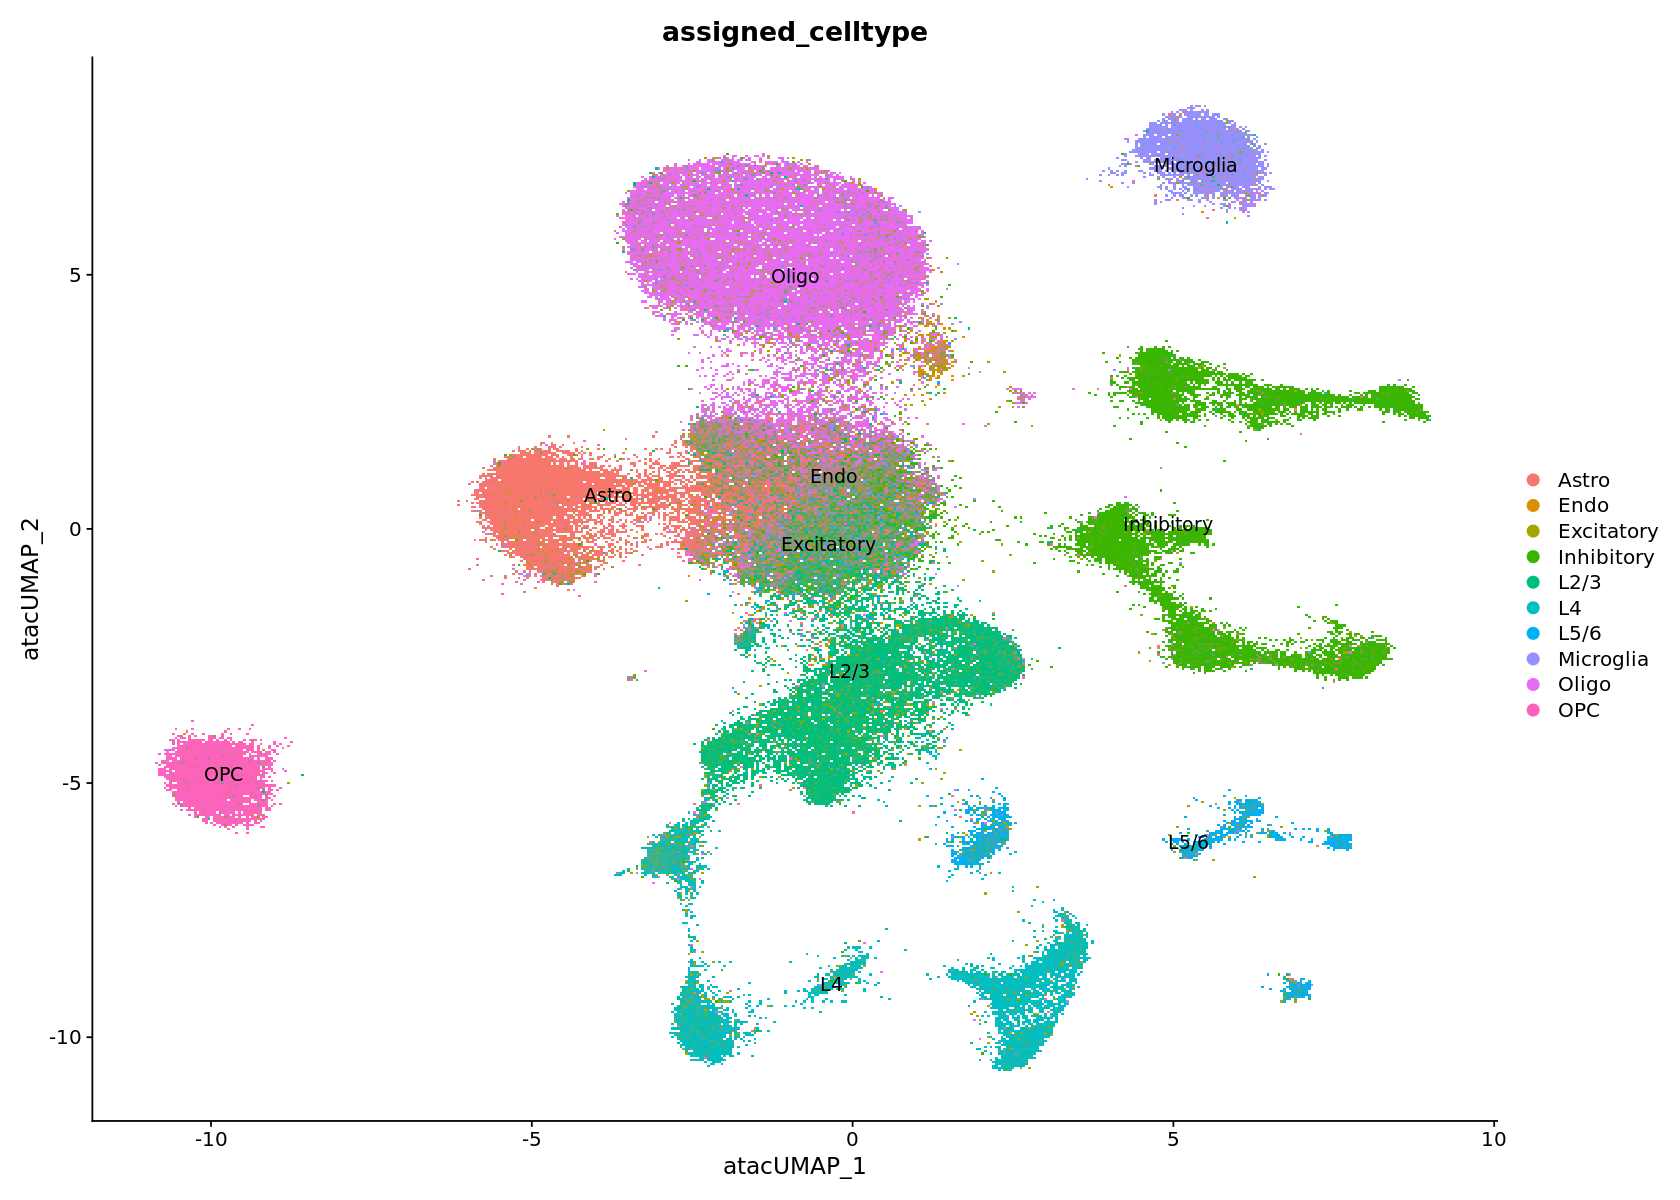

In [4]:
options(repr.plot.height = 10, repr.plot.width = 14)
gg1 = DimPlot(pfc_obj, group.by = 'assigned_celltype', label = TRUE, pt.size = 1)
gg1

In [5]:
# Read metadata (https://portal.brain-map.org/atlases-and-data/rnaseq/human-multiple-cortical-areas-smart-seq)
metadata <- read.csv(file = "/nfs/lab/parulk/brain/metadata.csv", row.names = 1)

In [6]:
head(metadata)

,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,subclass_order,⋯,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
F2S4_160113_027_A01,LS-15005h_S01_E1-50,nucleus,,NA,,,NA,,,NA,⋯,NA,,,NA,,#3DCC3D,2,H200.1025,True,Outlier L1-3 SST OR2AD1P
F2S4_160113_027_B01,LS-15005h_S02_E1-50,nucleus,#E170FE,32,Inh L2-5 VIP TOX2,#0066FF,4,GABAergic,#996517,3,⋯,32,,#E170FE,32,Neuron 032,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_C01,LS-15005h_S03_E1-50,nucleus,#8E5864,2,Inh L1 LAMP5 GGT8P,#0066FF,4,GABAergic,#FF7373,1,⋯,2,,#8E5864,2,Neuron 002,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_D01,LS-15005h_S04_E1-50,nucleus,#8B5862,1,Inh L1 LAMP5 NDNF,#0066FF,4,GABAergic,#FF7373,1,⋯,1,,#8B5862,1,Neuron 001,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_E01,LS-15005h_S05_E1-50,nucleus,#CF6EC9,34,Inh L1-3 VIP ZNF322P1,#0066FF,4,GABAergic,#996517,3,⋯,34,,#CF6EC9,34,Neuron 034,#3DCC3D,2,H200.1025,False,
F2S4_160113_027_F01,LS-15005h_S06_E1-50,nucleus,#E693CE,35,Inh L3 VIP CBLN1,#0066FF,4,GABAergic,#996517,3,⋯,35,,#E693CE,35,Neuron 035,#3DCC3D,2,H200.1025,False,


In [7]:
# Load the data.table library, to access the fread() function
library(data.table)

In [8]:
# Read the single-cell RNA-seq counts from disk. 
counts <- fread("/nfs/lab/parulk/brain/matrix.csv", data.table = FALSE)

In [9]:
# Set the cell barcodes as rownames.

rownames(counts) <- counts$sample_name

In [10]:
# Remove the column sample_name to have a count matrix. 
counts <- counts[,-!names(counts) %in% c("sample_name")]

In [11]:
# Set the count matrix as a matrix. 
counts <- as.matrix(counts)

In [12]:
# Transpose the counts matrix to get the correct format to be used as input in Seurat.

transposed_counts <- t(counts)

In [13]:
# Remove old count objects to free space. 
rm(counts)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11969498,639.3,17510475,935.2,17510475,935.2
Vcells,5371589351,40982.0,8088146306,61707.7,7981061024,60890.7


In [14]:
head(transposed_counts)

,F2S4_160113_027_A01,F2S4_160113_027_B01,F2S4_160113_027_C01,F2S4_160113_027_D01,F2S4_160113_027_E01,F2S4_160113_027_F01,F2S4_160113_027_G01,F2S4_160113_028_B01,F2S4_160113_028_C01,F2S4_160113_028_F01,⋯,F2S4_190227_099_F01,F2S4_190227_099_G01,F2S4_190227_099_H01,F2S4_190227_100_A01,F2S4_190227_100_B01,F2S4_190227_100_C01,F2S4_190227_100_E01,F2S4_190227_100_F01,F2S4_190227_100_G01,F2S4_190227_100_H01
3.8-1.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3.8-1.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3.8-1.4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3.8-1.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5-HT3C2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG,0,118,0,159,1,10,0,1,0,0,⋯,0,0,0,32,0,0,0,0,7,136


In [15]:
# Create the Seurat object with the transposed raw counts and cell metadata without filtering any cell or genes. 
atlas_data<- CreateSeuratObject(counts = transposed_counts,

  meta.data = metadata, min.cells = 0, min.features = 0,

  project ="AllenBrainMap_SMART-seq-Human-Multiple-Cortical-Areas")

Counts matrix provided is not sparse. Creating V5 assay in Seurat Object.



In [16]:
atlas_data

An object of class Seurat 
50281 features across 49417 samples within 1 assay 
Active assay: RNA (50281 features, 0 variable features)
 1 layer present: counts

In [17]:
table(atlas_data$region_label)


  A1C   CgG  M1lm  M1ul   MTG  S1lm  S1ul   V1C 
 6703  6279  3371  2864 16155  2805  3188  8052 

In [18]:
table(atlas_data$subclass_label)


                      Astrocyte     Endothelial              IT           L4 IT 
           1985            1187              70           21841            3725 
          L5 ET    L5/6 IT Car3         L5/6 NP           L6 CT             L6b 
            158            1053             816            2556            1080 
          LAMP5       Microglia Oligodendrocyte             OPC            PAX6 
           2434             750            1930             773             325 
       Pericyte           PVALB             SST             VIP            VLMC 
             32            2800            2358            3533              11 

In [19]:
# Dom says to include A1C, CgG, M1lm, M1ul, MTG, S1lm, S1ul...basically everything except visual (V1C)
atlas_data<-subset(x = atlas_data, subset = region_label %in% c("A1C", "M1lm", "M1ul", "MTG", "S1lm", "S1ul", "CgG"))

In [20]:
atlas_data

An object of class Seurat 
50281 features across 41365 samples within 1 assay 
Active assay: RNA (50281 features, 0 variable features)
 1 layer present: counts

In [21]:
# Exclude CAR3 and also some unknown cell types ""?
atlas_data<-subset(x = atlas_data, subset = subclass_label %in% c("","Astrocyte", "Endothelial", "IT", "L4 IT", "L5 ET", "L5/6 NP", "L6 CT", "L6b", "LAMP5", "Microglia", "Oligodendrocyte", "OPC", "PAX6", "Pericyte", "PVALB", "SST", "VLMC", "VIP"))


In [22]:
table(atlas_data$region_label)


  A1C   CgG  M1lm  M1ul   MTG  S1lm  S1ul 
 6542  6214  3278  2804 15879  2756  3134 

In [23]:
table(atlas_data$subclass_label)


                      Astrocyte     Endothelial              IT           L4 IT 
           1784            1128              64           19495            1129 
          L5 ET         L5/6 NP           L6 CT             L6b           LAMP5 
            151             752            1608             964            2245 
      Microglia Oligodendrocyte             OPC            PAX6        Pericyte 
            694            1657             670             301              28 
          PVALB             SST             VIP            VLMC 
           2457            2124            3346              10 

In [24]:
table(atlas_data$class_label)


                  GABAergic Glutamatergic  Non-neuronal 
         1784         10473         24099          4251 

In [25]:
atlas_data

An object of class Seurat 
50281 features across 40607 samples within 1 assay 
Active assay: RNA (50281 features, 0 variable features)
 1 layer present: counts

In [26]:
# Normalize gene counts. 
atlas_data <- NormalizeData(atlas_data, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [27]:
# Identify genes that are outliers on a 'mean variability plot'.
atlas_data <- FindVariableFeatures(atlas_data, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



In [28]:
# Scale and center variable genes. Perform linear dimensionality reduction by PCA over the variable genes (default option).
atlas_data <- ScaleData(atlas_data, verbose = FALSE)

In [29]:
# Perform dimensionality reduction to summarize and visualize the cells in the low-dimensional space. 
atlas_data <- RunPCA(atlas_data,verbose = FALSE)

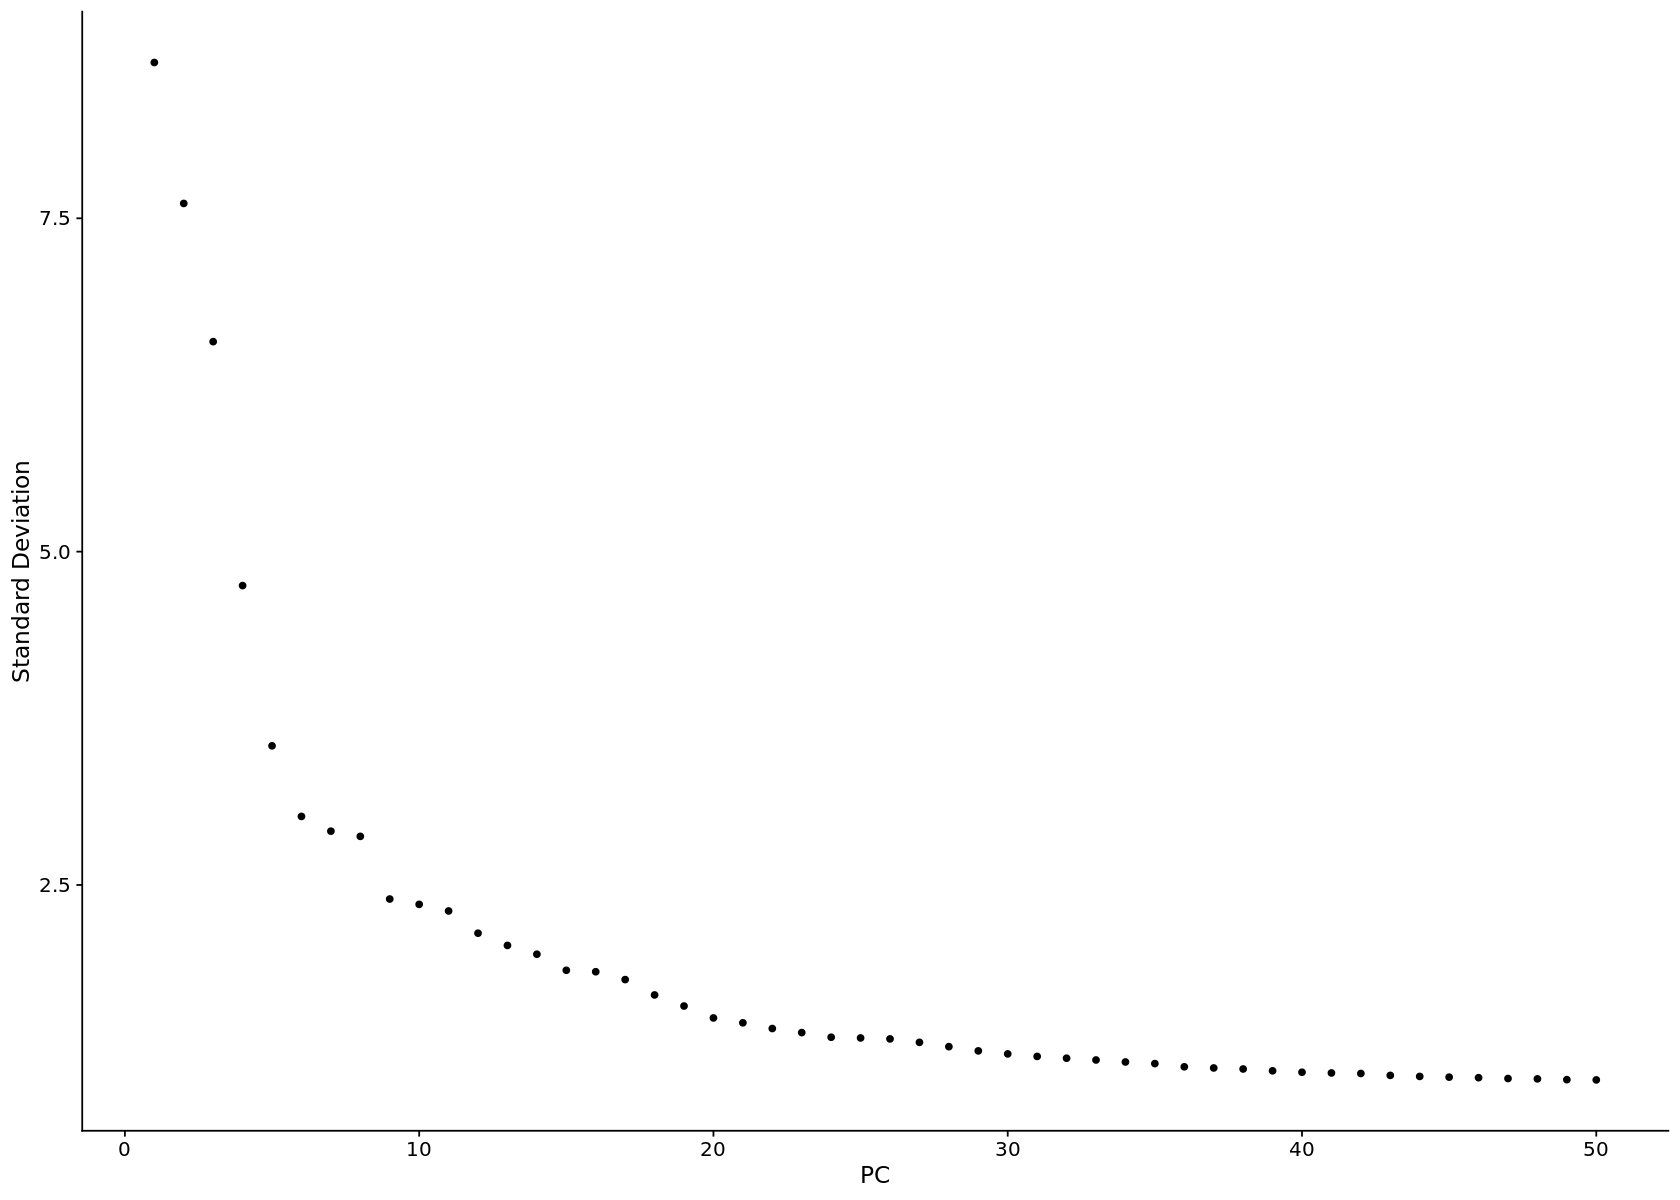

In [30]:
# Elbow plot Estimate the number of principal components (PCs) that are biologically informative by plotting the standard deviations of the PCs
ElbowPlot(atlas_data, ndims = 50)

In [31]:
str(atlas_data)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    : int [1:50281, 1:40607] 0 0 0 0 0 0 0 0 41 0 ...
  .. .. .. .. ..$ data      : num [1:50281, 1:40607] 0 0 0 0 0 ...
  .. .. .. .. ..$ scale.data: num [1:2000, 1:40607] -0.0206 0.155 -0.1189 -0.2681 -0.1846 ...
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:40607, 1:3] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ : chr [1:40607] "F2S4_160113_027_A01" "F2S4_160113_027_B01" "F2S4_160113_027_C01" "F2S4_160113_027_D01" ...
  .. .. .. .. .. .. .. ..$ : chr [1:3] "counts" "data" "scale.data"
  .. .. .. .. .. ..$ dim     : int [1:2] 40607 3
  .. .. .. .. .. ..$ dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:40607] "F2S4_160

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



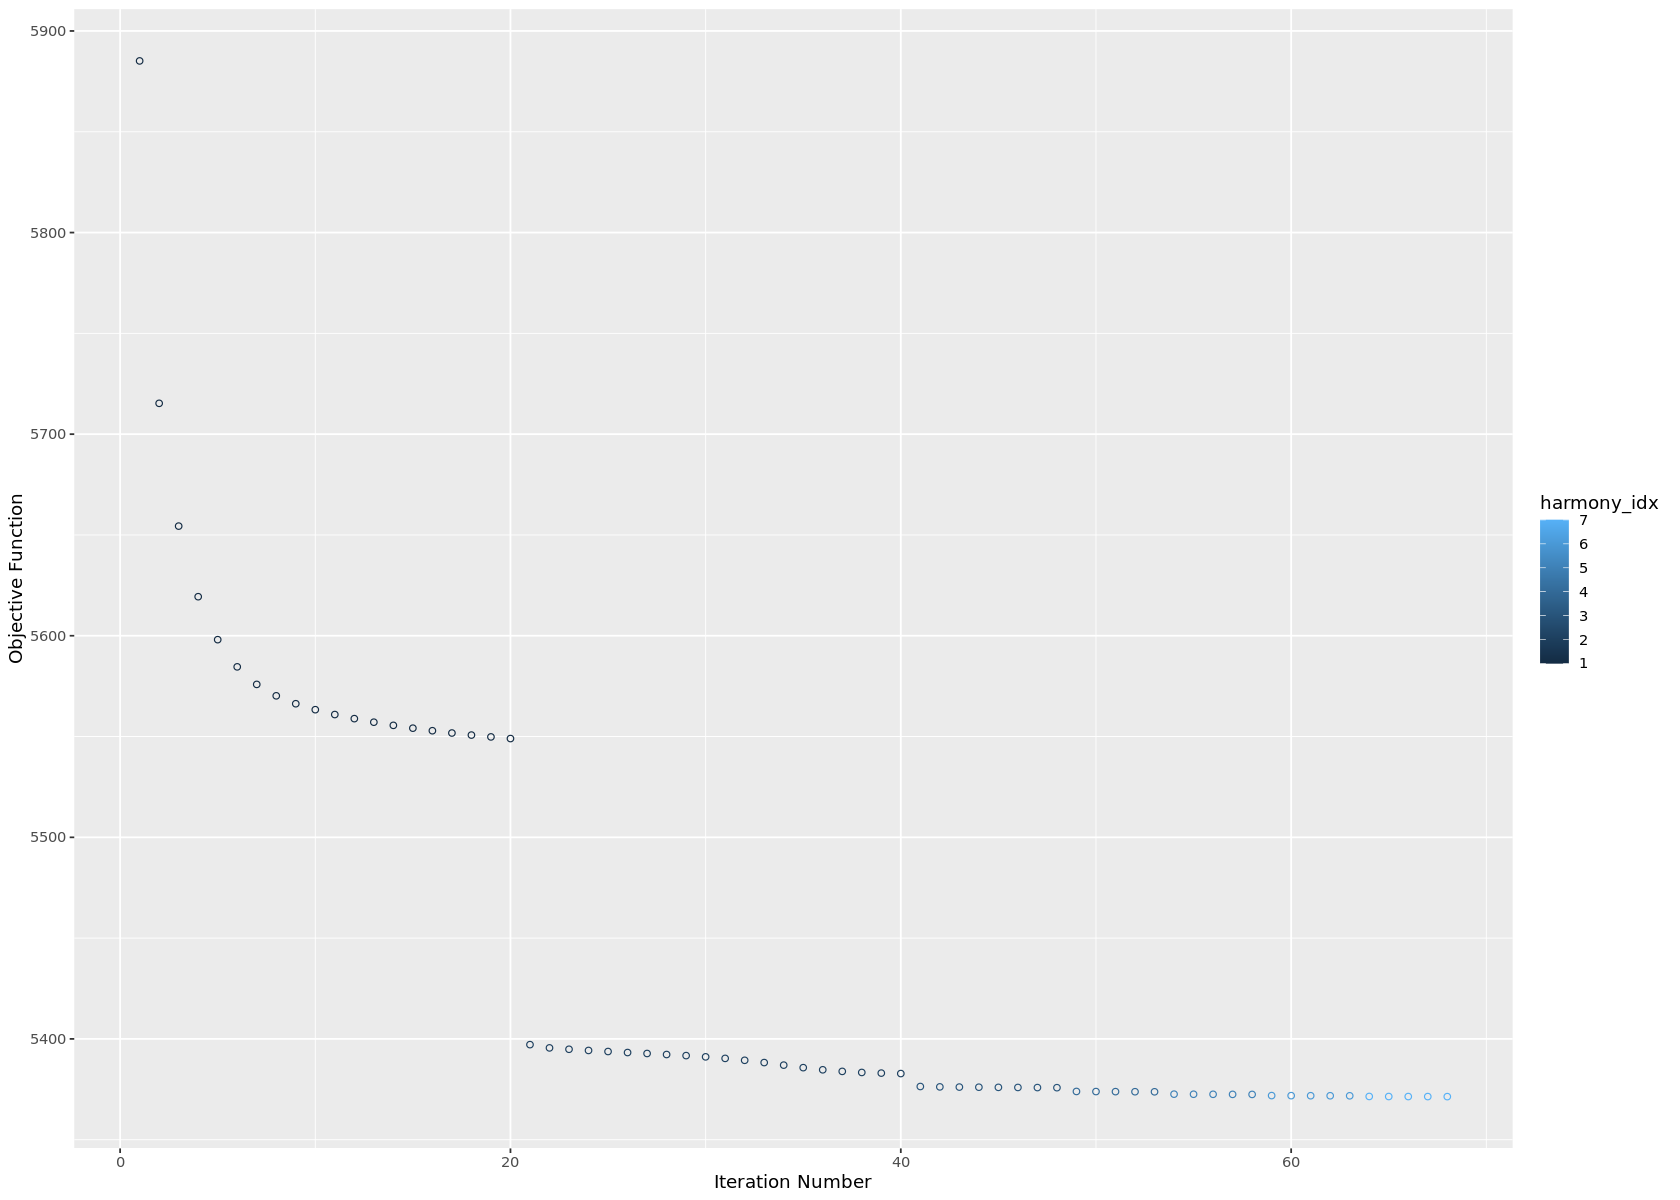

In [32]:
atlas_data <- RunHarmony(atlas_data, group.by.vars='donor_sex_label', assay.use='RNA', plot_convergence = TRUE)

In [33]:
atlas_data

An object of class Seurat 
50281 features across 40607 samples within 1 assay 
Active assay: RNA (50281 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, harmony

In [34]:
# Perform non-linear dimensionality reduction over biologically informative dimensions from linear dimensionality reduction using uniform manifold approximation and projection (UMAP) (McInnes et al., 2018).

atlas_data <- RunUMAP(atlas_data, dims = 1:20)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
17:44:21 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:44:21 Read 40607 rows and found 20 numeric columns

17:44:21 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

17:44:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:44:25 Writing NN index file to 

In [35]:
atlas_data <- FindNeighbors(atlas_data, reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [36]:
atlas_data <- FindClusters(atlas_data, algorithm=4,resolution = 0.5 ,method = "igraph") #Algorithm 4 is Leiden clustering

Warning message in paste(el[, 1], el[, 2], sep = "|"):
"NAs introduced by coercion to integer range"
Warning message in paste(el[, 1], el[, 2], sep = "|"):
"NAs introduced by coercion to integer range"
Warning message in deparse(substitute(arg)):
"NAs introduced by coercion to integer range"
Warning message in paste0("igraph::", x):
"NAs introduced by coercion to integer range"
Warning message in deparse(x[[1L]]):
"NAs introduced by coercion to integer range"
Warning message in deparse(expr, width.cutoff, ...):
"NAs introduced by coercion to integer range"
Warning message in paste(deparse(expr, width.cutoff, ...), collapse = collapse):
"NAs introduced by coercion to integer range"
Warning message in deparse(x[[1L]]):
"NAs introduced by coercion to integer range"
Warning message in deparse(expr, width.cutoff, ...):
"NAs introduced by coercion to integer range"
Warning message in paste(deparse(expr, width.cutoff, ...), collapse = collapse):
"NAs introduced by coercion to integer range"
W

In [67]:
saveRDS(atlas_data, "/nfs/lab/parulk/brain/Human-Multiple-Cortical-Areas-Atlas-final.rds")

In [106]:
table(pfc_obj$assigned_celltype)


     Astro       Endo Excitatory Inhibitory       L2/3         L4       L5/6 
     14939       1415       8695      19031      17835      10500       4068 
 Microglia      Oligo        OPC 
      7448      27903       6843 

In [38]:
atlas_data

An object of class Seurat 
50281 features across 40607 samples within 1 assay 
Active assay: RNA (50281 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


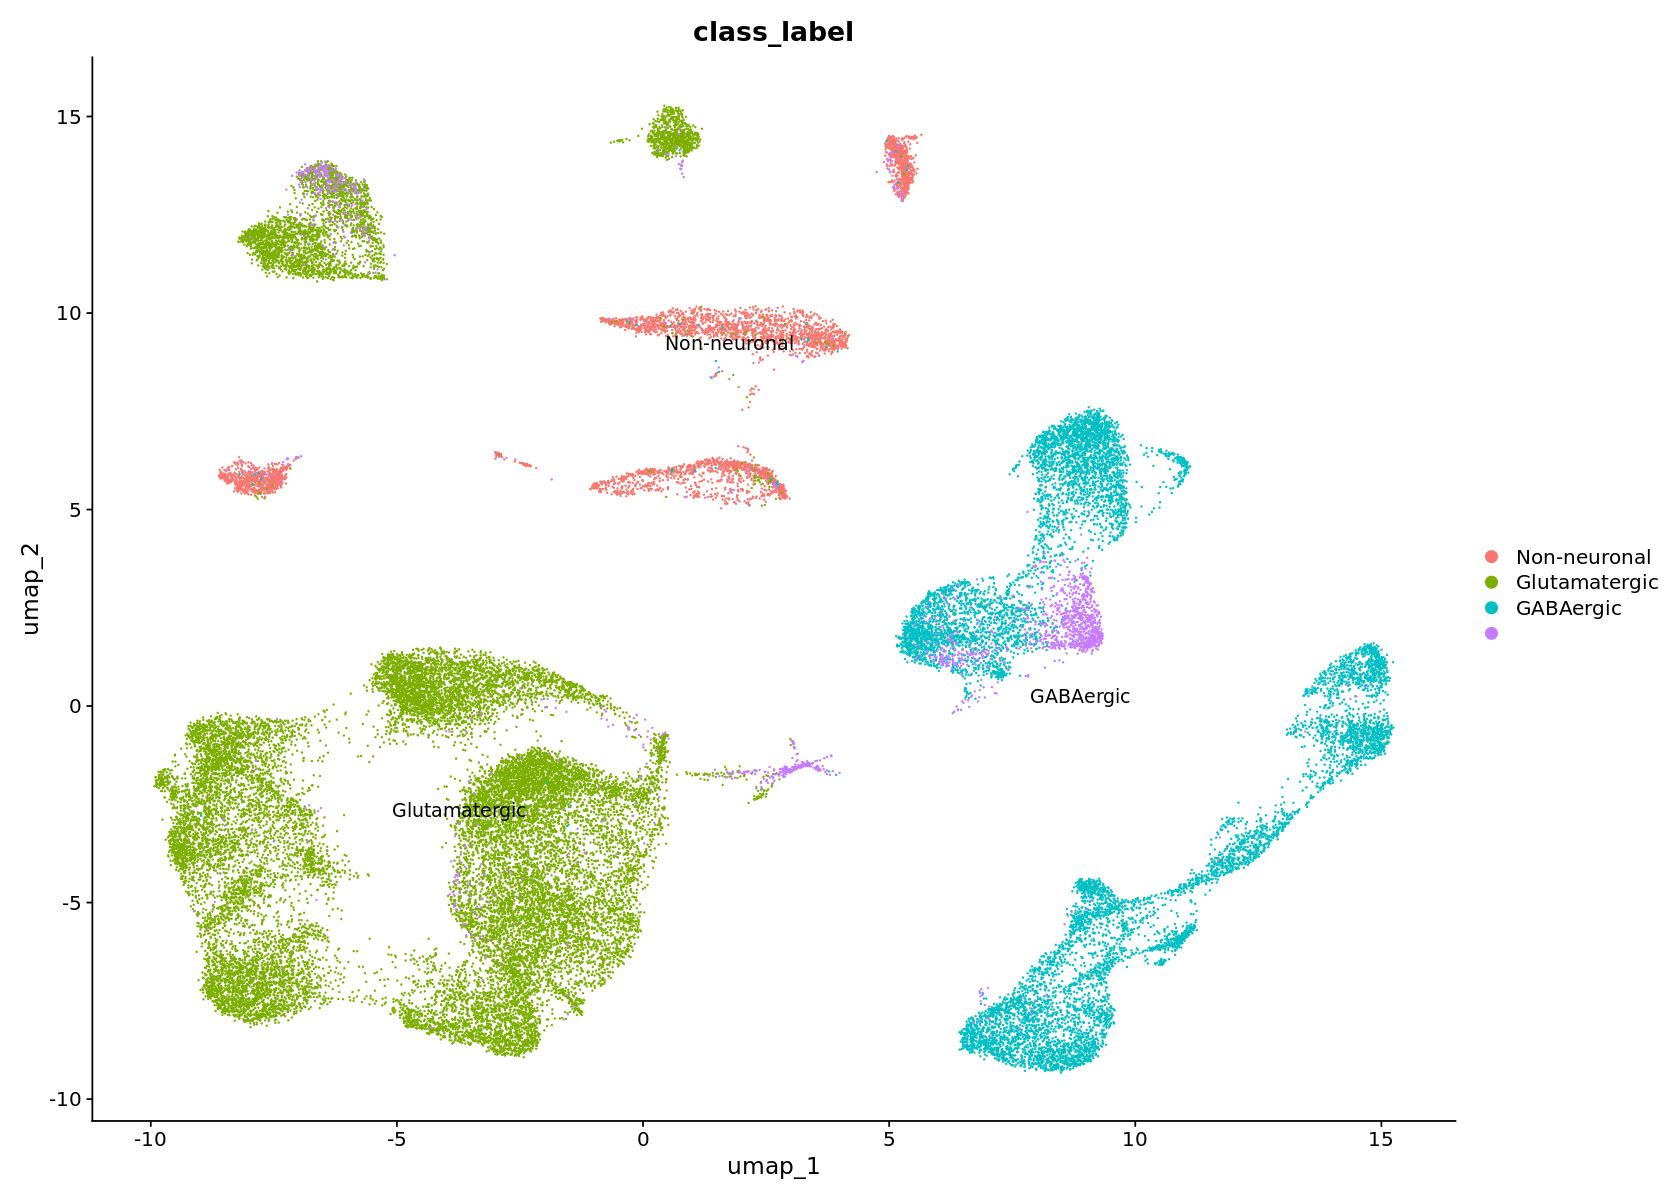

In [39]:
DimPlot(atlas_data, group.by = "class_label", order = "class_order", label="True")

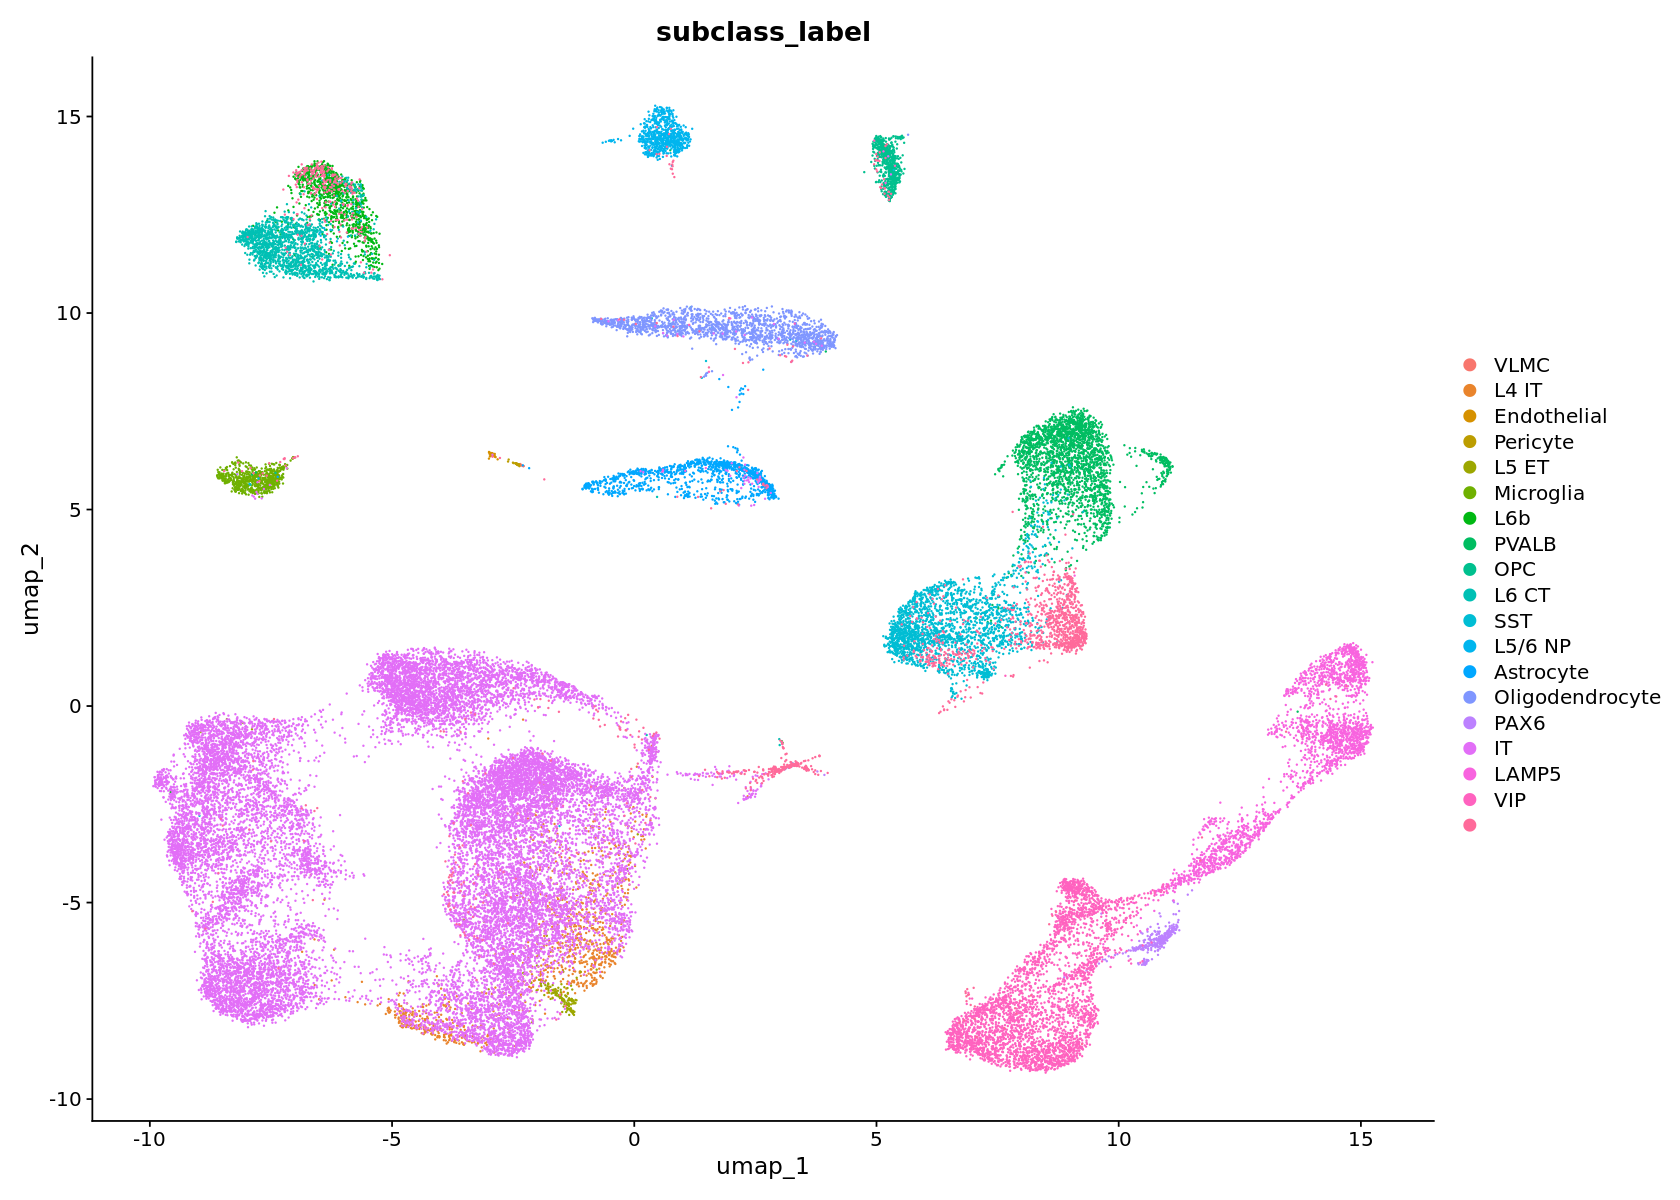

In [40]:
options(repr.plot.height = 10, repr.plot.width = 14)
gg2 = DimPlot(atlas_data,group.by = 'subclass_label', order = "subclass_order")
gg2

In [41]:
# Identify anchors

transfer.anchors <- FindTransferAnchors(reference = atlas_data, query = pfc_obj, features = VariableFeatures(object = atlas_data),
                                        reference.assay = "RNA", query.assay = "RNA", reduction = "cca")


Warning message:
"746 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 1254 features."
Running CCA

Merging objects

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.1 GiB"
Finding neighborhoods

Finding anchors

	Found 69035 anchors



In [57]:
pfc_obj

An object of class Seurat 
156845 features across 118677 samples within 4 assays 
Active assay: ATAC (50000 features, 50000 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 7 dimensional reductions calculated: pca, harmony.rna, umap.rna, lsi, harmony.atac, umap.atac, umap.wnn

In [58]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = atlas_data$subclass_label,  weight.reduction = pfc_obj[["harmony.rna"]], dims = 2:30)
pfc_obj <- AddMetaData(pfc_obj, metadata = celltype.predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [66]:
# save rds obj
saveRDS(pfc_obj,file='/nfs/lab/parulk/brain/pfc_lt.rds')

In [88]:
remotes::install_version(package = 'Seurat')
library(Seurat)

Installing package into '/home/parulk/R/x86_64-pc-linux-gnu-library/4.1'
(as 'lib' is unspecified)



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



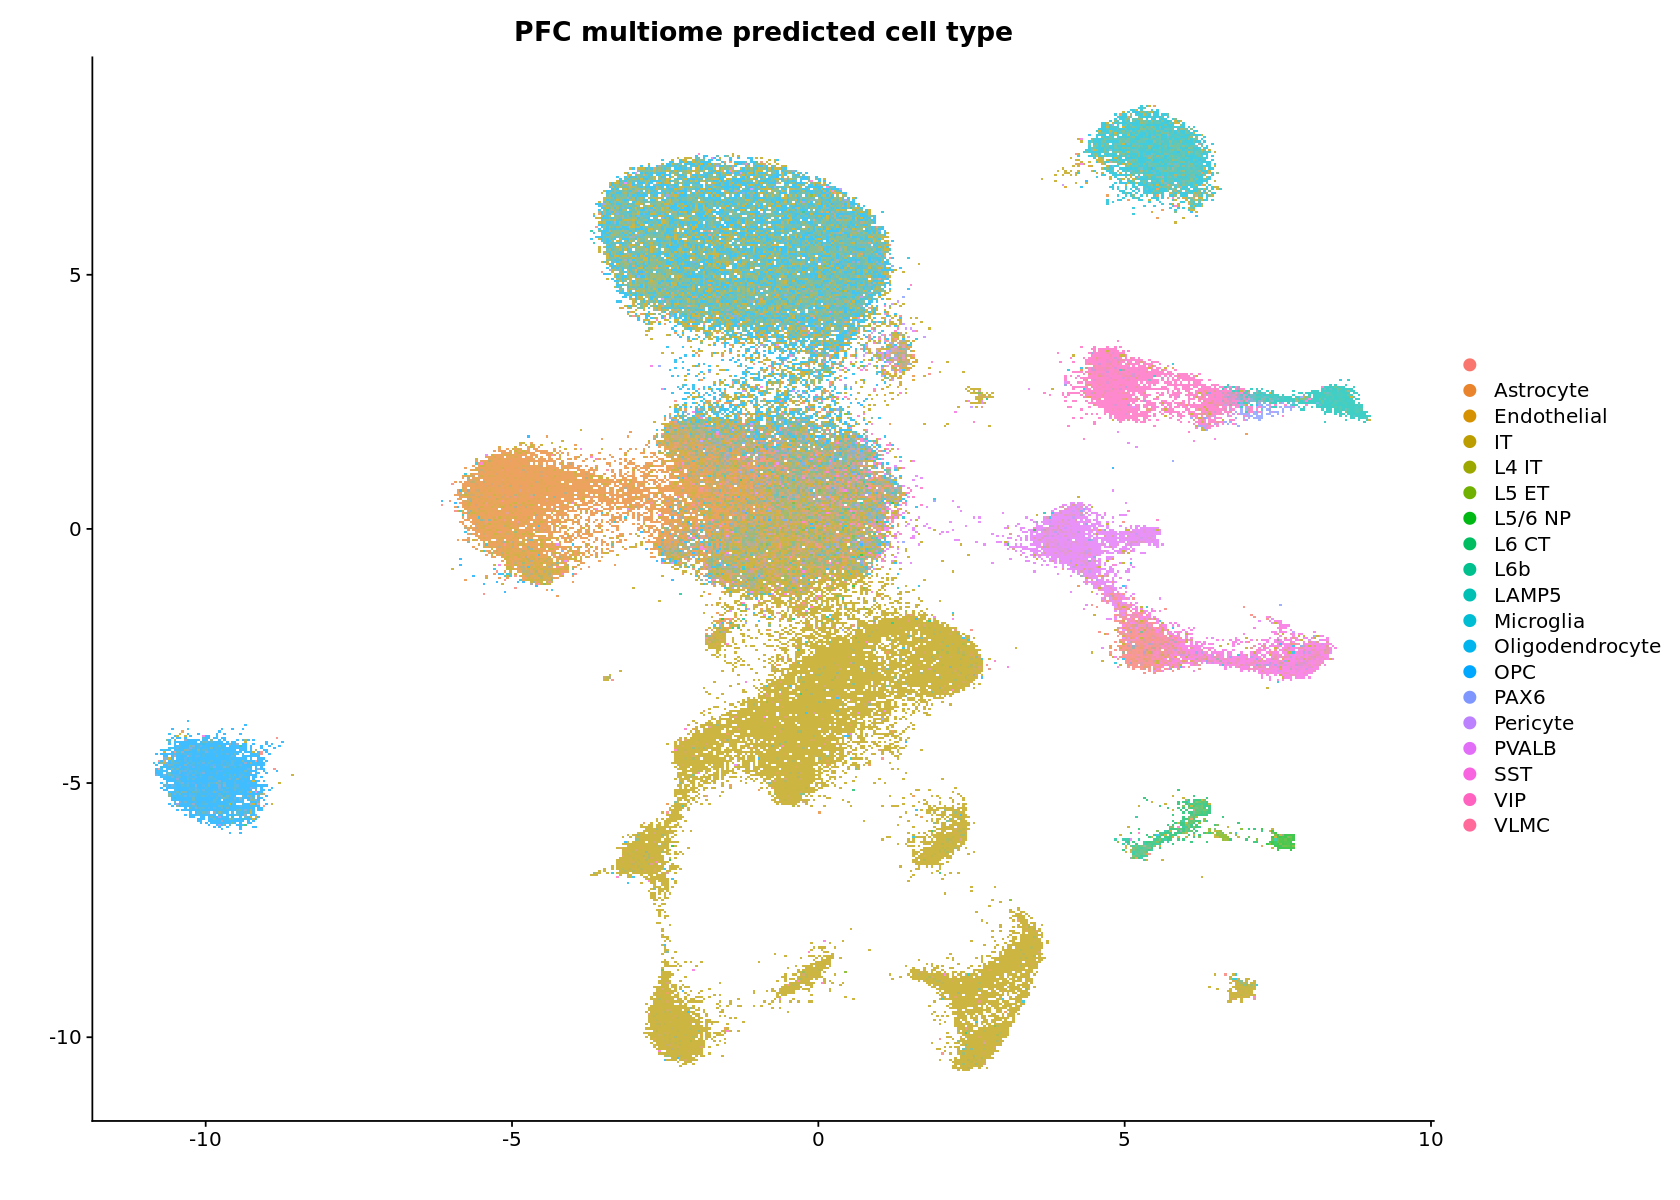

In [94]:
options(repr.plot.height = 10, repr.plot.width = 14)
gg1 = DimPlot(pfc_obj, group.by ='predicted.id', pt.size = .75, raster=TRUE) +
            labs(y= "", x = "", title = "PFC multiome predicted cell type")
gg1

In [62]:
install.packages("patchwork")
library(patchwork)

Installing package into '/home/parulk/R/x86_64-pc-linux-gnu-library/4.1'
(as 'lib' is unspecified)


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



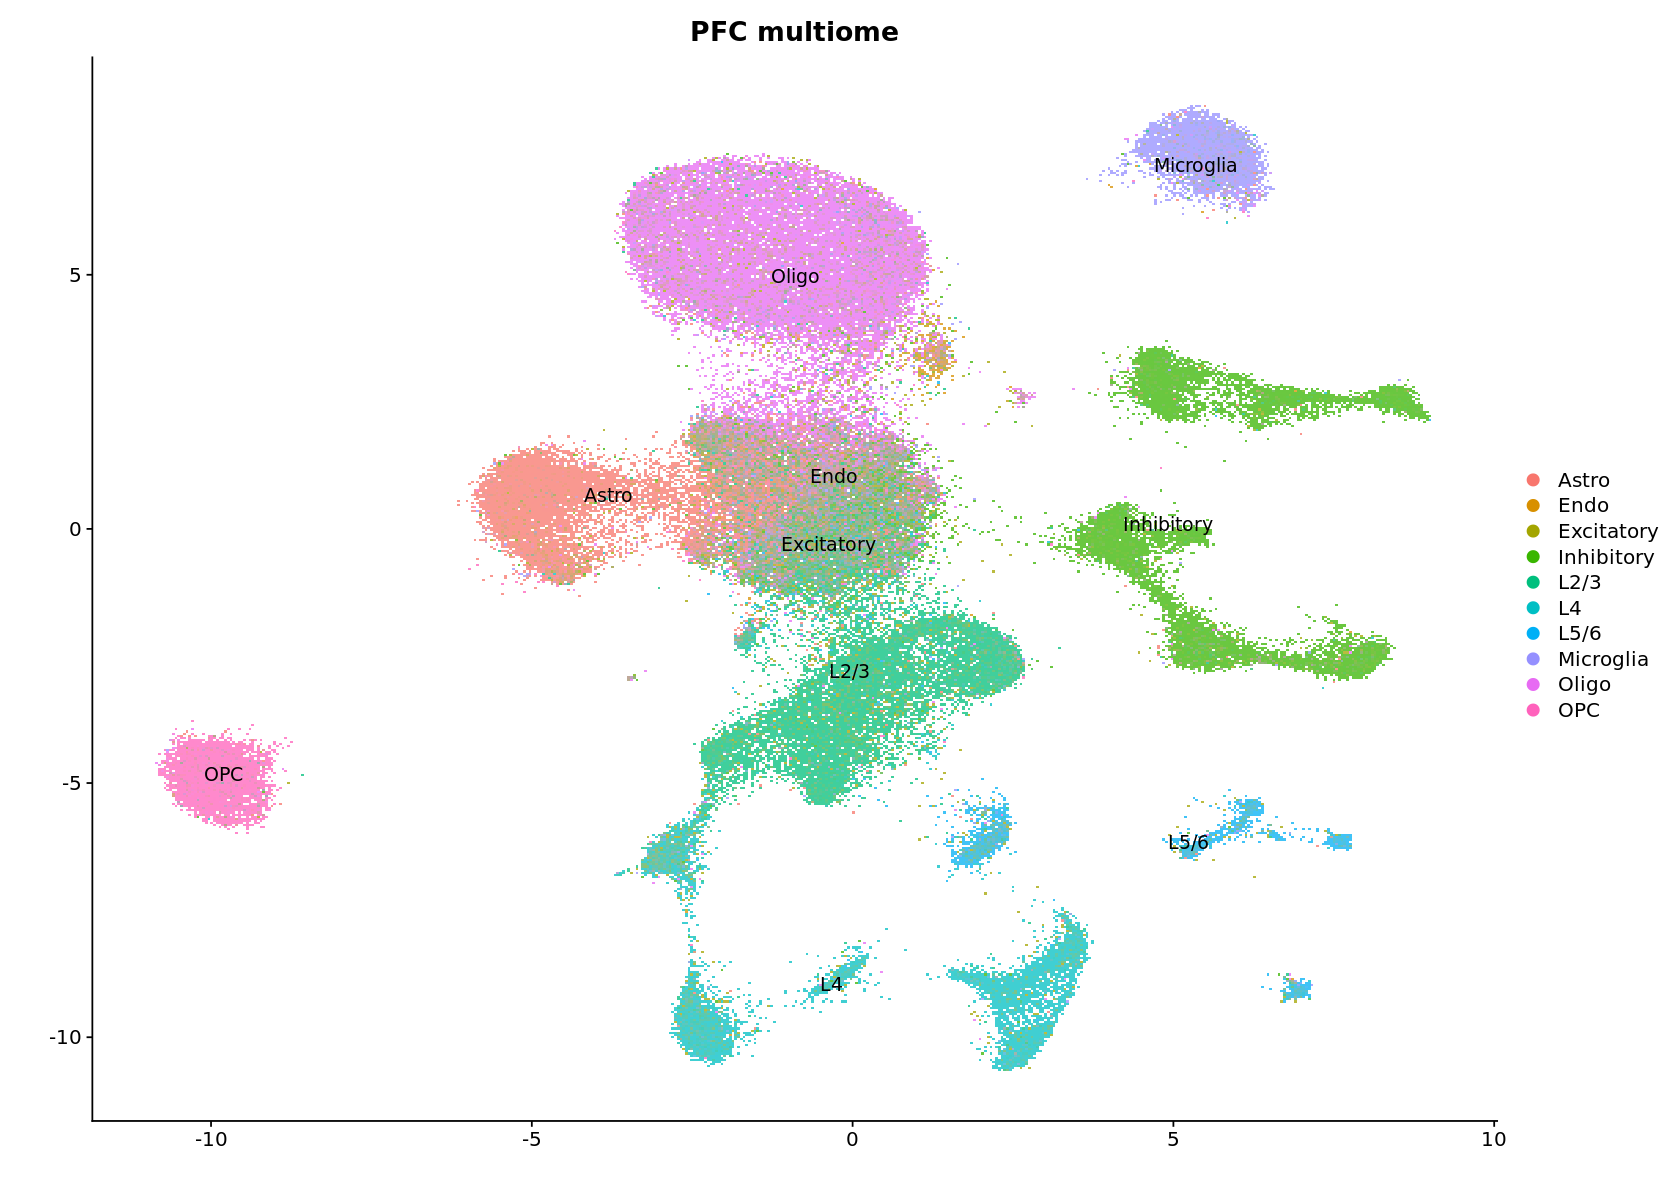

In [78]:
options(repr.plot.height = 10, repr.plot.width = 14)
gg3 = DimPlot(pfc_obj, label = TRUE, pt.size = .75, group.by = 'assigned_celltype') +
            labs(y= "", x = "", title = "PFC multiome")
gg3

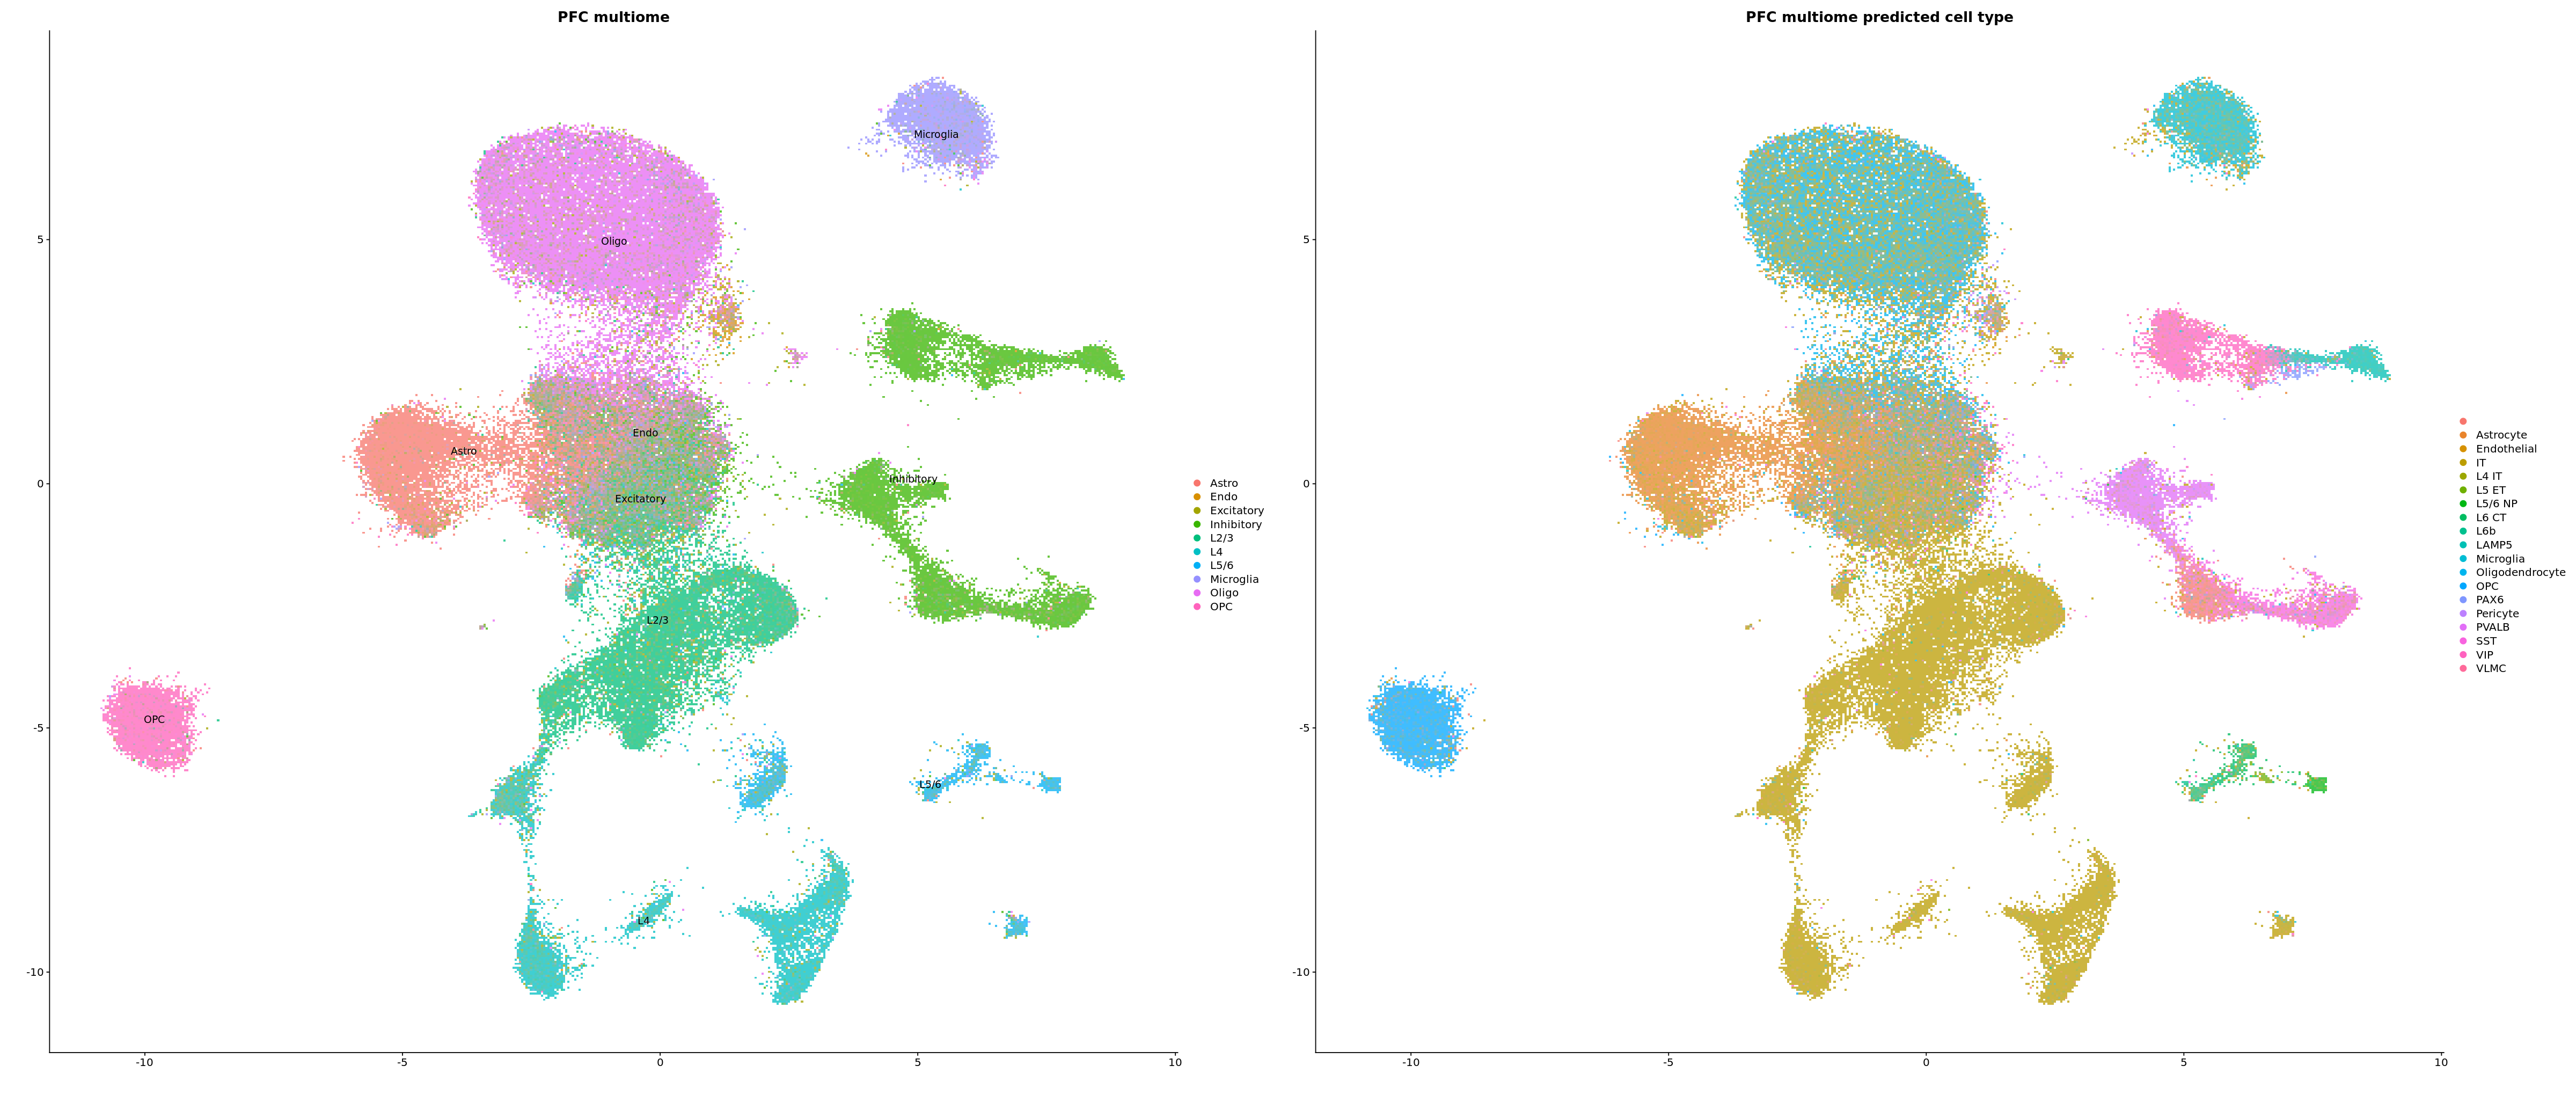

In [64]:
options(repr.plot.height = 17, repr.plot.width = 40)
combined_plot <- gg3 + gg1
combined_plot

In [69]:
cell.cluster = as.data.frame(table(pfc_obj$assigned_celltype,pfc_obj$predicted.id))
cell.cluster <- cell.cluster[cell.cluster$Freq > 10, ]
cell.cluster <- cell.cluster %>%
  arrange(Var1)
cell.cluster

Var1,Var2,Freq
<fct>,<fct>,<int>
Astro,,48
Astro,Astrocyte,12654
Astro,IT,2022
Astro,Microglia,76
Astro,Oligodendrocyte,24
Astro,OPC,93
Astro,VIP,13
Endo,,116
Endo,Endothelial,456


In [102]:
p1 <- ggplot(pfc_obj@meta.data, aes(x = assigned_celltype, fill = predicted.id)) + geom_bar() +
    theme_classic() + 
theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 25),
    axis.text.y = element_text(size = 25),
    axis.title = element_text(size = 30),  # Increase axis title size
    legend.title = element_text(size = 25),  # Increase legend title size
    legend.text = element_text(size = 25)  # Increase legend text size
  ) 

In [103]:
p2 <- ggplot(pfc_obj@meta.data, aes(x = predicted.id, fill = assigned_celltype)) + geom_bar() +
    theme_classic() + 
theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 25),
    axis.text.y = element_text(size = 25),
    axis.title = element_text(size = 30),  # Increase axis title size
    legend.title = element_text(size = 25),  # Increase legend title size
    legend.text = element_text(size = 25)  # Increase legend text size
  ) 

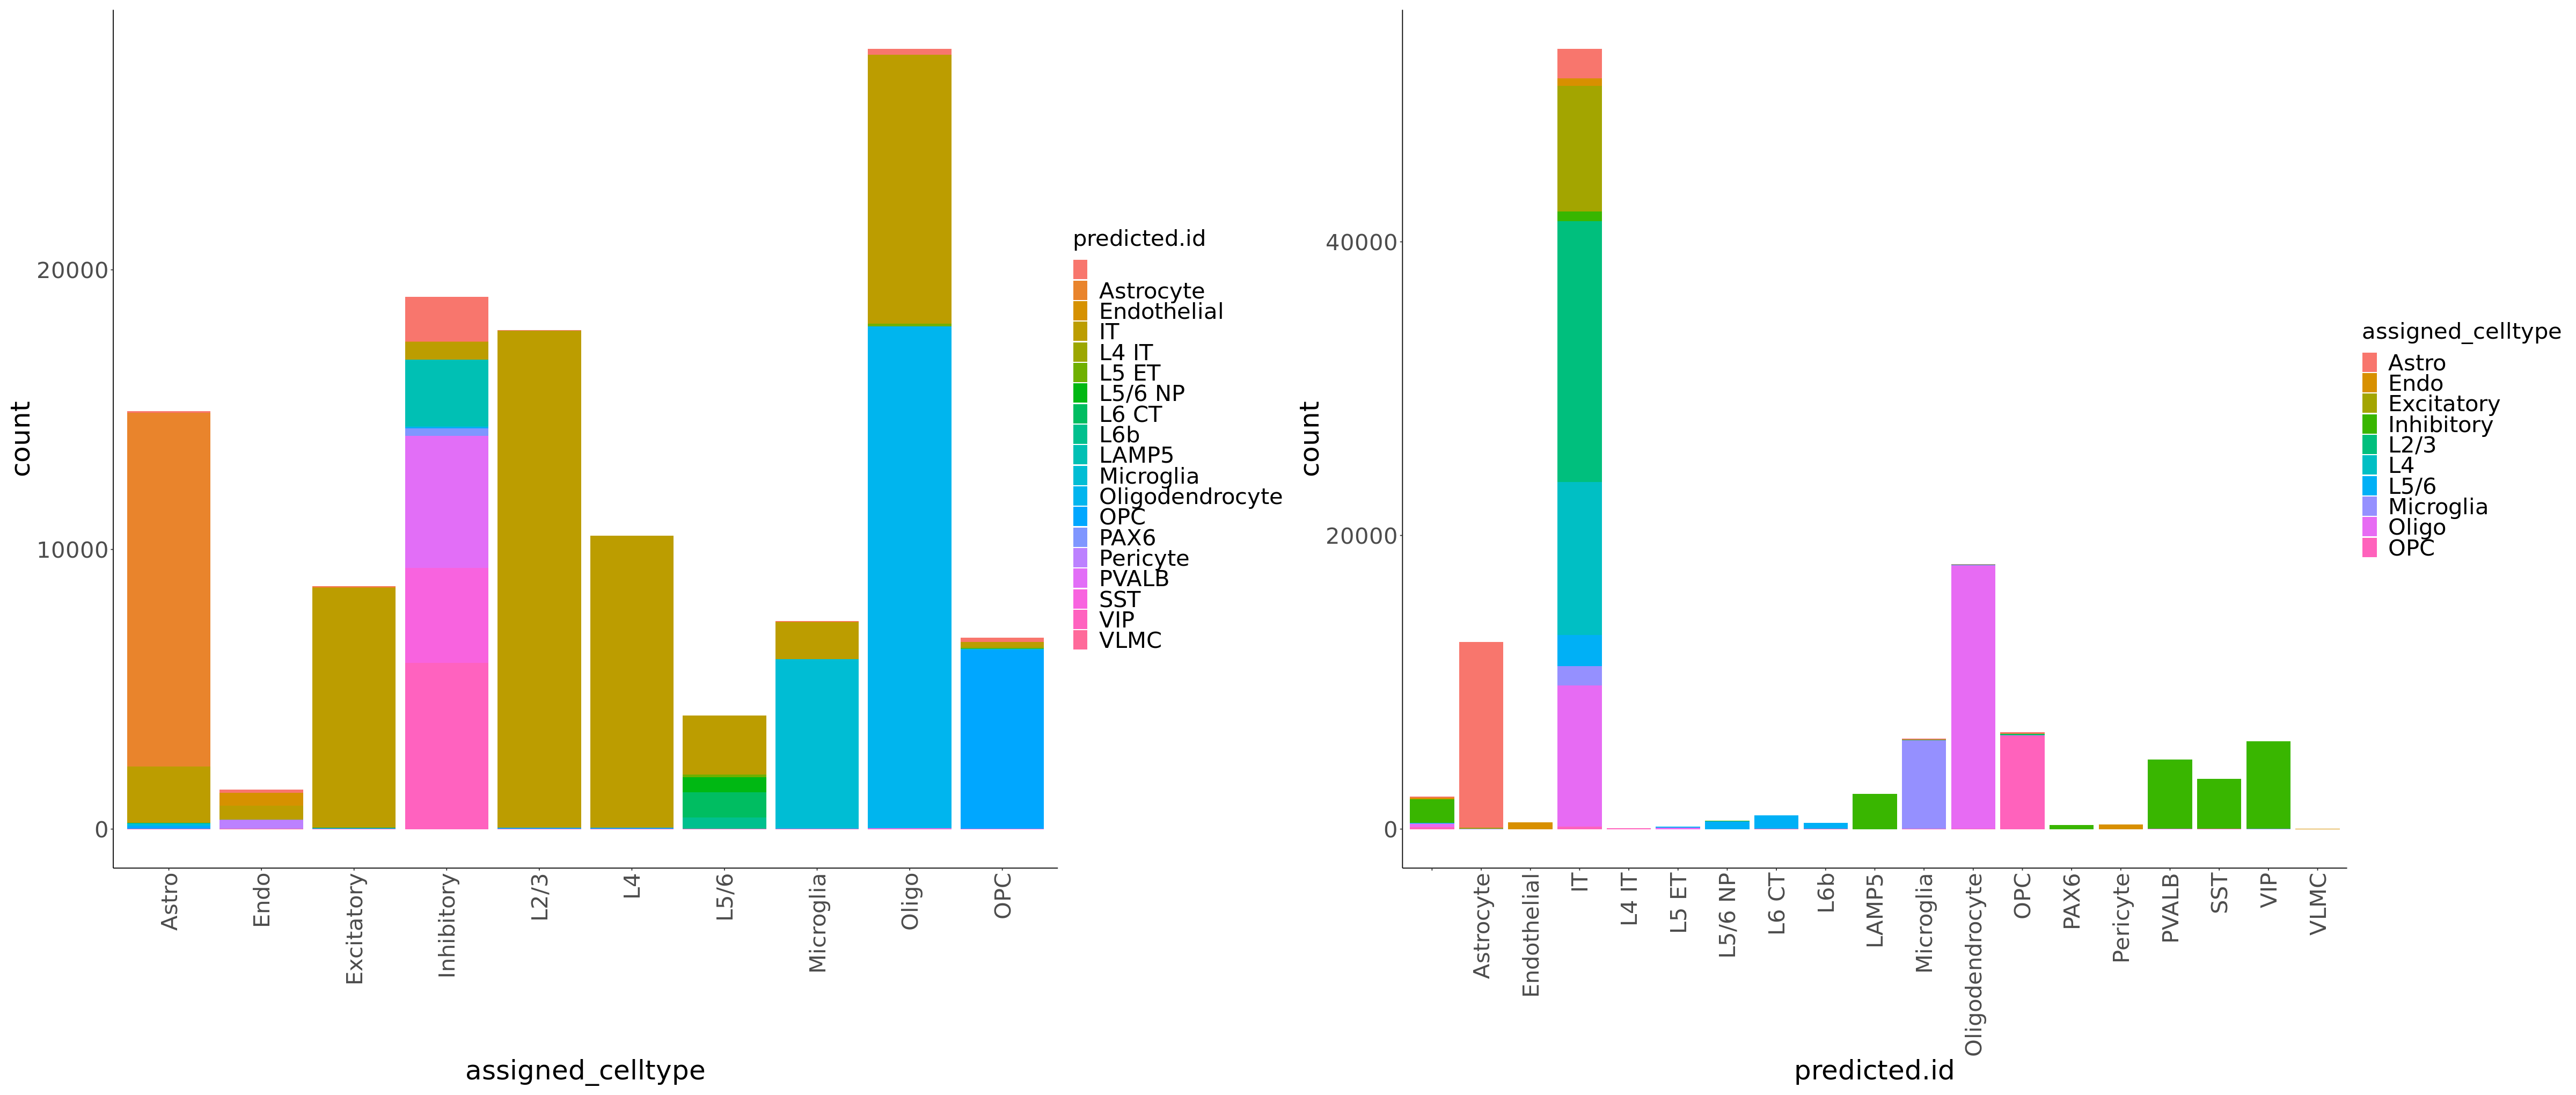

In [104]:
options(repr.plot.height = 17, repr.plot.width = 40)
combined_plot <- p1 + p2
combined_plot

In [71]:
install.packages("pheatmap")
library(pheatmap)

Installing package into '/home/parulk/R/x86_64-pc-linux-gnu-library/4.1'
(as 'lib' is unspecified)



In [72]:
heatmap_params <- list(
  scale = "row",           # Scale rows (cells)
  color = colorRampPalette(c("white", "blue"))(50),  # Choose colors
  show_rownames = TRUE,
  show_colnames = TRUE,
  main = "Prediction Score Heatmap"
)

In [74]:
install.packages("reshape2")


Installing package into '/home/parulk/R/x86_64-pc-linux-gnu-library/4.1'
(as 'lib' is unspecified)



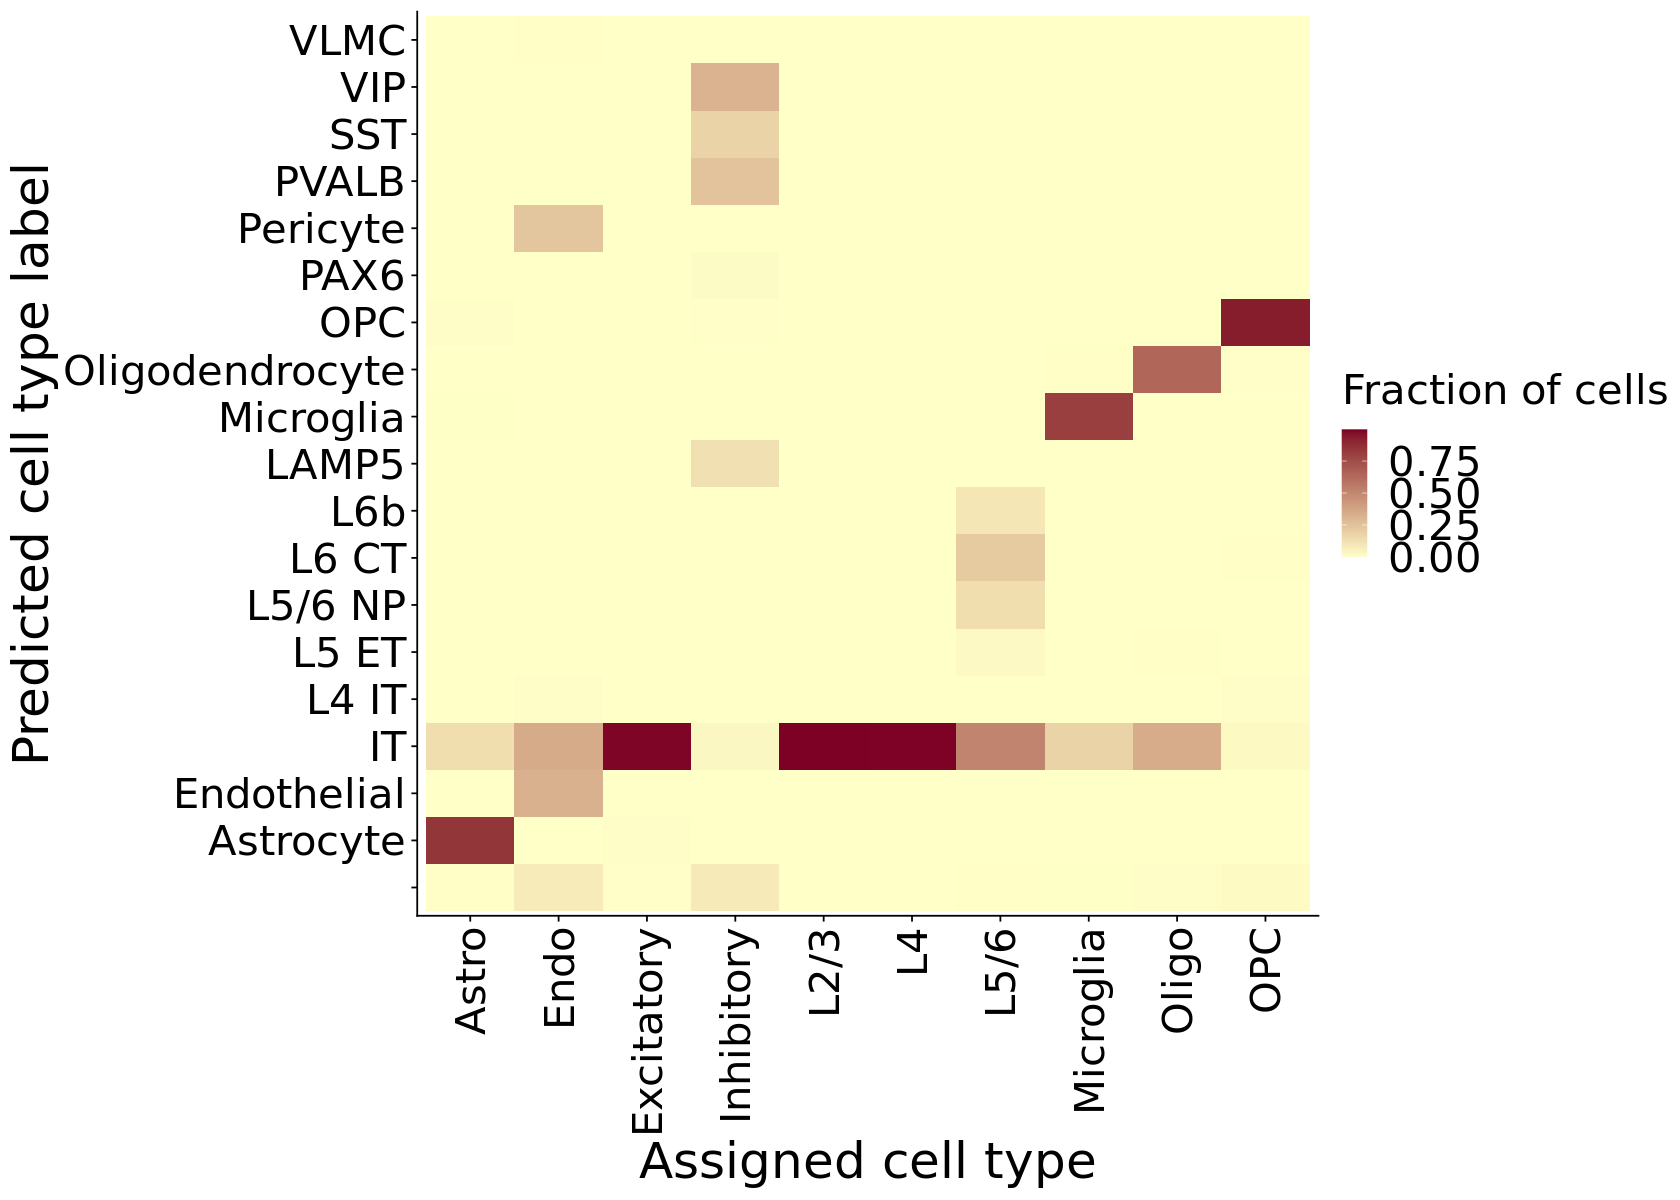

In [98]:
predictions <- table(pfc_obj$assigned_celltype, pfc_obj$predicted.id)
predictions <- predictions/rowSums(predictions)  # normalize for number of cells in each cell type
predictions <- as.data.frame(predictions)
p1 <- ggplot(predictions, aes(Var1, Var2, fill = Freq)) + geom_tile() + scale_fill_gradient(name = "Fraction of cells",
    low = "#ffffc8", high = "#7d0025") + xlab("Assigned cell type") + ylab("Predicted cell type label") +
    theme_cowplot() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 25),
    axis.text.y = element_text(size = 25),
    axis.title = element_text(size = 30),  # Increase axis title size
    legend.title = element_text(size = 25),  # Increase legend title size
    legend.text = element_text(size = 25)  # Increase legend text size
  ) 

p1 

In [76]:
table(pfc_obj@meta.data$prediction.score.max > 0.60)


 FALSE   TRUE 
 12097 106580 

In [137]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12           patchwork_1.1.3          
 [3] cowplot_1.1.1             Signac_1.11.9000         
 [5] BiocParallel_1.28.3       gplots_3.1.3             
 [7] reticulate_1.32.0.9002    sctransform_0.4.0        
 [9] future_1.33.0        

In [138]:
pfc_obj

An object of class Seurat 
156845 features across 118677 samples within 4 assays 
Active assay: RNA (36611 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: RNA_raw, ATAC, SCT
 7 dimensional reductions calculated: pca, harmony.rna, umap.rna, lsi, harmony.atac, umap.atac, umap.wnn

In [139]:
atlas_data

An object of class Seurat 
50281 features across 40607 samples within 1 assay 
Active assay: RNA (50281 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap